In [18]:
# 画图工具
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:\windows\fonts\MicroSoft YaHei.ttc", size=12)
# %matplotlib inline 
# auto 弹出窗口 inline 默认，在当前页显示
#指定默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

import math
import seaborn as sns
import warnings;warnings.filterwarnings(action='once')
import matplotlib as mpl
from ipywidgets import widgets,Button,Label

warnings.filterwarnings('ignore')

large=22;med=16;small=12;
params={'axes.titlesize':large,
        'legend.fontsize':med,
        'figure.figsize':(16,10),
        'axes.labelsize':med,
        'axes.titlesize':med,
        'xtick.labelsize':med,
        'ytick.labelsize':med,
        'figure.titlesize':large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')

In [81]:
df = pd.read_excel(r"C:\Users\57165\Desktop\data\datas\seasons.xlsx",sheet_name='Sheet9',dtype={'drq':str,'szl':str})
df=df.fillna(0)
df.head()

,drq,szl,nzb,nzhzb
0,2019-01-01,0101奶粉,0.479163,0.0
1,2019-01-02,0101奶粉,0.534195,0.0
2,2019-01-03,0101奶粉,0.510545,0.0
3,2019-01-04,0101奶粉,0.554851,0.0
4,2019-01-05,0101奶粉,0.586538,0.0


In [3]:
from statsmodels.tsa.seasonal import STL


In [166]:
# elecequip=df.loc[df['szl']=='0201膨化']
# elecequip.set_index=elecequip['drq']
# stl = STL(elecequip['nzb'], period=60, robust=True)
# res_robust = stl.fit()
# fig = res_robust.plot()
@widgets.interact_manual(
    color=['blue', 'red', 'green',''],sfl=sorted(df['szl'].unique()),Text='T')
# 分店汇总

def plot1(color='blue',sfl='0201膨化', grid=True,):
    t = df['drq'].unique()
    k=df.loc[df['szl']==sfl]
    stl = STL(k['nzb'], period=30, robust=True)
    res_robust = stl.fit()

    plt.figure(figsize=(18, 10))
    t=df.loc[res_robust.weights.index,'drq']
    plt.subplot(411)
    plt.plot(res_robust.observed)
    plt.subplot(412)
    plt.plot(res_robust.trend)

    plt.subplot(413)
    plt.plot(res_robust.seasonal)

    plt.subplot(414)
    plt.plot(res_robust.resid)
    # locs,labes=plt.xticks()
    # locs=list([i for i in range(len(t)) if i%250==0])
    # print(locs,t,t.iloc[locs])
    # plt.xticks(locs,t.iloc[locs])
    plt.show()


interactive(children=(Dropdown(description='color', options=('blue', 'red', 'green', ''), value='blue'), Dropd…

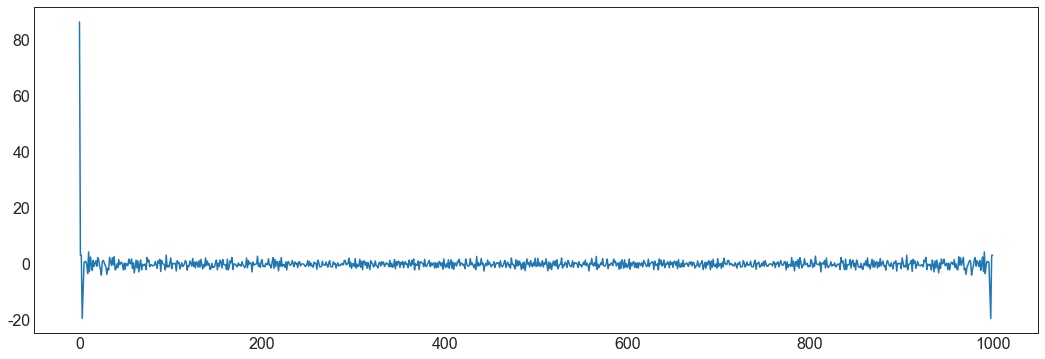

In [85]:
ft=np.fft.fft(df.loc[df['szl']=='0904防虫杀虫']['nzb'])
plt.figure(figsize=(18,6))
plt.plot(ft)
# drq=df['drq'].unique();
# t=list([drq[i] for i in range(len(drq)) if i%5==0]);
# plt.xticks(t,Rotation=30);
plt.show()

In [104]:
stl = STL(df.loc[df['szl']=='0904防虫杀虫']['nzb'], period=60, robust=True)
m=stl.fit()
i=m.seasonal
i[i>0.05]

38692    0.091235
38694    0.063796
38752    0.067930
39187    0.060544
39408    0.051072
39468    0.063016
39477    0.059880
39522    0.057541
39528    0.075841
39537    0.085446
39582    0.083646
39588    0.087109
39597    0.112271
Name: season, dtype: float64

In [165]:
 t=df.loc[m.weights.index,'drq']
 t.index

Int64Index([38639, 38640, 38641, 38642, 38643, 38644, 38645, 38646, 38647, 38648,
            ...
            39630, 39631, 39632, 39633, 39634, 39635, 39636, 39637, 39638, 39639], dtype='int64', length=1001)